# Explore here

In [35]:
import os
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("c0ff3772504a4a668d61d4b2a2424814")
client_secret = os.environ.get("4af0f81b54d44a92a962340b14fce4bb")




In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "c0ff3772504a4a668d61d4b2a2424814"
client_secret = "4af0f81b54d44a92a962340b14fce4bb"
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

id_kg = "790FomKkXshlbRYZFtlgla"

response = sp.artist_top_tracks(id_kg)

if response:
    tracks = response["tracks"]
    processed_tracks = [
        {
            k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v
            for k, v in track.items()
            if k in ["name", "popularity", "duration_ms"]
        }
        for track in tracks
    ]

    for track in processed_tracks:
        print(track)



{'duration_ms': 2.87995, 'name': 'QLONA', 'popularity': 83}
{'duration_ms': 2.8413333333333335, 'name': 'AMARGURA', 'popularity': 82}
{'duration_ms': 2.5729, 'name': 'MI EX TENÍA RAZÓN', 'popularity': 79}
{'duration_ms': 3.2988833333333334, 'name': 'TQG', 'popularity': 79}
{'duration_ms': 3.2131, 'name': 'CONTIGO (with Tiësto)', 'popularity': 80}
{'duration_ms': 3.4604333333333335, 'name': 'PROVENZA', 'popularity': 77}
{'duration_ms': 3.7682166666666665, 'name': 'MAMIII', 'popularity': 75}
{'duration_ms': 2.7397666666666667, 'name': 'MIENTRAS ME CURO DEL CORA', 'popularity': 77}
{'duration_ms': 3.3353333333333333, 'name': 'X SI VOLVEMOS', 'popularity': 76}
{'duration_ms': 2.3964833333333333, 'name': 'OKI DOKI', 'popularity': 73}


In [37]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,143789,True,{'isrc': 'USUG12305254'},{'spotify': 'https://open.spotify.com/track/4g...,https://api.spotify.com/v1/tracks/4gJfPoMIcSDG...,4gJfPoMIcSDGY0tMGxm6Fu,False,True,OKI DOKI,73,None,2,track,spotify:track:4gJfPoMIcSDGY0tMGxm6Fu
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,226093,False,{'isrc': 'USRC12200425'},{'spotify': 'https://open.spotify.com/track/7F...,https://api.spotify.com/v1/tracks/7FlQk2gJ6TBr...,7FlQk2gJ6TBrHHiidvdR2O,False,True,MAMIII,75,https://p.scdn.co/mp3-preview/0a699c30d354c4cb...,14,track,spotify:track:7FlQk2gJ6TBrHHiidvdR2O
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,200120,True,{'isrc': 'USUM72222547'},{'spotify': 'https://open.spotify.com/track/4N...,https://api.spotify.com/v1/tracks/4NoOME4Dhf4x...,4NoOME4Dhf4xgxbHDT7VGe,False,True,X SI VOLVEMOS,76,None,2,track,spotify:track:4NoOME4Dhf4xgxbHDT7VGe
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,207626,False,{'isrc': 'USUM72205906'},{'spotify': 'https://open.spotify.com/track/3H...,https://api.spotify.com/v1/tracks/3HqcNJdZ2seo...,3HqcNJdZ2seoGxhn0wVNDK,False,True,PROVENZA,77,None,12,track,spotify:track:3HqcNJdZ2seoGxhn0wVNDK
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,164386,False,{'isrc': 'USUM72300862'},{'spotify': 'https://open.spotify.com/track/6o...,https://api.spotify.com/v1/tracks/6otePxalBK8A...,6otePxalBK8AVa20xhZYVQ,False,True,MIENTRAS ME CURO DEL CORA,77,None,1,track,spotify:track:6otePxalBK8AVa20xhZYVQ


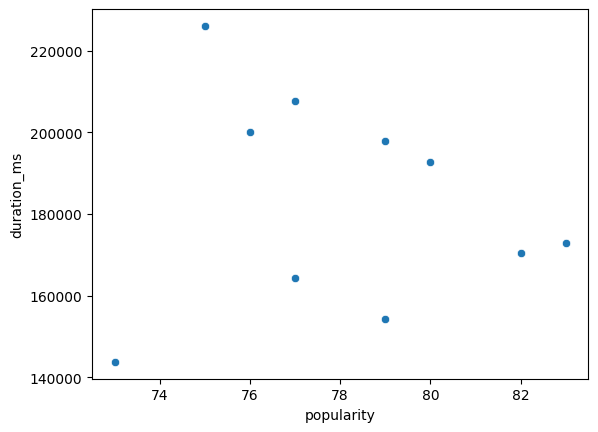

In [38]:
import seaborn as sns

scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_ms")
fig = scatter_plot.get_figure()




Como podemos ver, no hay una relación directa entre la duración de la canción y su popularidad.